In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns

In [2]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

In [3]:
tr_df = pl.read_csv(TR_FEATURES_CSV)
tr_df = tr_df.with_columns(pl.col("ID").str.split("_").list.get(0).alias("scene_id"))
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…"
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…"
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…"
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…"
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243,"""000fb056f97572d384bae4f5fc1e0f…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""fff88cca5f8a012427b96bdde66011…",-0.0,-0.0,16.102747,-1.0,0.0,true,0.0,false,"""drive""",false,true,0.00514,0.002648,-0.006207,0.013328,0.005834,-0.016368,0.019618,0.007763,-0.023074,0.028672,0.010737,-0.033795,0.0342,0.012502,-0.040583,0.043196,0.015644,-0.051309,"""fff88cca5f8a012427b96bdde66011…"
"""fff88cca5f8a012427b96bdde66011…",1.594968,0.350129,-5.791823,-97.0,0.0,false,0.0,false,"""drive""",false,true,0.663311,-0.002493,-0.009528,1.516447,-0.004223,-0.020431,2.425366,-0.002958,-0.023108,3.319161,-0.012259,-0.027327,4.106655,-0.023314,-0.024449,4.708509,-0.027916,-0.026821,"""fff88cca5f8a012427b96bdde66011…"
"""fff88cca5f8a012427b96bdde66011…",-0.004207,-0.037833,-2.089301,0.0,0.0,true,0.0,false,"""drive""",false,true,0.022788,0.000622,-0.006612,0.046445,0.001039,-0.017674,0.062182,0.000714,-0.024352,0.079601,0.000491,-0.034149,0.091362,-0.000041,-0.039632,0.10623,-0.001123,-0.04789,"""fff88cca5f8a012427b96bdde66011…"


In [4]:
ts_df = pl.read_csv(TS_FEATURES_CSV)
ts_df = ts_df.with_columns(pl.col("ID").str.split("_").list.get(0).alias("scene_id"))
ts_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…"
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…"
"""012baccc145d400c896cb82065a93d…",3.604152,-0.286239,10.774388,-110.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…"
"""012baccc145d400c896cb82065a93d…",2.048902,-0.537628,61.045235,189.0,0.0,true,0.0,false,"""drive""",true,false,"""012baccc145d400c896cb82065a93d…"
"""01d738e799d260a10f6324f78023b3…",2.201528,-1.8986,5.740093,-41.0,0.0,true,0.0,false,"""drive""",false,false,"""01d738e799d260a10f6324f78023b3…"
…,…,…,…,…,…,…,…,…,…,…,…,…
"""ff4f00a76fbf4db0cb15579c7c6086…",14.528915,0.553588,1.450901,119.0,0.0,false,0.025,true,"""drive""",false,false,"""ff4f00a76fbf4db0cb15579c7c6086…"
"""ff4f00a76fbf4db0cb15579c7c6086…",15.489772,0.311154,-1.327874,-124.0,0.0,false,0.355,true,"""drive""",false,false,"""ff4f00a76fbf4db0cb15579c7c6086…"
"""ff4f00a76fbf4db0cb15579c7c6086…",16.470867,-0.021787,-1.826507,-105.0,0.0,false,0.22,true,"""drive""",false,false,"""ff4f00a76fbf4db0cb15579c7c6086…"


In [5]:
class Target:
    def __init__(self, prefix: str):
        self.prefix = prefix

    def fit(self, df: pl.DataFrame):
        return self

    def transform(self, df: pl.DataFrame):
        pf = self.prefix
        df = df.with_columns(
            pl.col("x_0").alias(f"{pf}x_0"),
            pl.col("y_0").alias(f"{pf}y_0"),
            pl.col("z_0").alias(f"{pf}z_0"),
            pl.col("x_1").alias(f"{pf}x_1"),
            pl.col("y_1").alias(f"{pf}y_1"),
            pl.col("z_1").alias(f"{pf}z_1"),
            pl.col("x_2").alias(f"{pf}x_2"),
            pl.col("y_2").alias(f"{pf}y_2"),
            pl.col("z_2").alias(f"{pf}z_2"),
            pl.col("x_3").alias(f"{pf}x_3"),
            pl.col("y_3").alias(f"{pf}y_3"),
            pl.col("z_3").alias(f"{pf}z_3"),
            pl.col("x_4").alias(f"{pf}x_4"),
            pl.col("y_4").alias(f"{pf}y_4"),
            pl.col("z_4").alias(f"{pf}z_4"),
            pl.col("x_5").alias(f"{pf}x_5"),
            pl.col("y_5").alias(f"{pf}y_5"),
            pl.col("z_5").alias(f"{pf}z_5"),
        )

        self.columns = [col for col in df.columns if col.startswith(self.prefix)]
        df = df.select(self.columns)
        return df


target = Target(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_x_0', 'tg_y_0', 'tg_z_0', 'tg_x_1', 'tg_y_1', 'tg_z_1', 'tg_x_2', 'tg_y_2', 'tg_z_2', 'tg_x_3', 'tg_y_3', 'tg_z_3', 'tg_x_4', 'tg_y_4', 'tg_z_4', 'tg_x_5', 'tg_y_5', 'tg_z_5']
Rows: 9
Columns: 19
$ statistic <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_x_0    <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_y_0    <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_z_0    <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_x_1    <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1110552313515663, 2.3347733190583524, 8.082799715190657, 13.569839002261446, 26.160460553005198
$ tg_

In [6]:
class Feature:
    def __init__(self, prefix: str):
        self.prefix = prefix

    def fit(self, df: pl.DataFrame):
        return self

    def transform(self, df: pl.DataFrame):
        pf = self.prefix
        df = df.with_columns(
            pl.col("vEgo").alias(f"{pf}vEgo"),
            pl.col("aEgo").alias(f"{pf}aEgo"),
            pl.col("steeringAngleDeg").alias(f"{pf}steeringAngleDeg"),
            pl.col("steeringTorque").alias(f"{pf}steeringTorque"),
            pl.col("brake").alias(f"{pf}brake"),
            (pl.col("brakePressed") * 1.0).alias(f"{pf}brakePressed"),
            pl.col("gas").alias(f"{pf}gas"),
            (pl.col("gasPressed") * 1.0).alias(f"{pf}gasPressed"),
            ((pl.col("gearShifter") == "drive") * 1.0).alias(
                f"{pf}is_gearShifter_drive"
            ),
            ((pl.col("gearShifter") == "neutral") * 1.0).alias(
                f"{pf}is_gearShifter_neutral"
            ),
            ((pl.col("gearShifter") == "park") * 1.0).alias(f"{pf}is_gearShifter_park"),
            ((pl.col("gearShifter") == "reverse") * 1.0).alias(
                f"{pf}is_gearShifter_reverse"
            ),
            (pl.col("leftBlinker") * 1.0).alias(f"{pf}leftBlinker"),
            (pl.col("rightBlinker") * 1.0).alias(f"{pf}rightBlinker"),
        )

        self.columns = [col for col in df.columns if col.startswith(self.prefix)]

        df = df.select(self.columns)

        return df


feature = Feature(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo', 'ft_aEgo', 'ft_steeringAngleDeg', 'ft_steeringTorque', 'ft_brake', 'ft_brakePressed', 'ft_gas', 'ft_gasPressed', 'ft_is_gearShifter_drive', 'ft_is_gearShifter_neutral', 'ft_is_gearShifter_park', 'ft_is_gearShifter_reverse', 'ft_leftBlinker', 'ft_rightBlinker']
Rows: 9
Columns: 15
$ statistic                 <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo                   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547
$ ft_aEgo                   <f64> 43371.0, 0.0, -0.015654028629347255, 0.6324016778486632, -4.936206340789795, -0.2363678514957428, -1.8347540436410405e-15, 0.22229795157909396, 3.1400704383850098
$ ft_steeringAngleDeg       <f64> 43371.0, 0.0, -2.065172574071012, 65.54882159006848, -481.394287109375, -3.461754322052002, -0.35647091269493103, 2.6269068717956543, 484.69171142578125
$ ft_steeringTorque         <f64>

In [7]:
from sklearn.model_selection import GroupKFold
import lightgbm as lgb


def train_lgbm_with_groupkfold(
    df, target_cols: list[str], feature_cols: list[str], group_col: str, n_splits=5
):
    df = df.select(feature_cols + target_cols + [group_col])

    params = {
        "objective": "regression",
        "metric": "rmse",
        "max_depth": 5,
        "max_leaves": 2 ** (4 - 1),
        "boosting_type": "gbdt",
    }

    # {target_col: [model1, model2, ...]}
    models = {}
    oof_preds = np.full((len(df), len(target_cols)), np.nan)

    group_kfold = GroupKFold(n_splits=n_splits)

    for fold, (tr_idx, vl_idx) in enumerate(
        group_kfold.split(df, groups=df.get_column(group_col))
    ):
        print("-----------------")
        print("-----------------")
        print(f"Training fold {fold + 1}...")
        tr_df = df[tr_idx]
        vl_df = df[vl_idx]

        for i_tg, tg_col in enumerate(target_cols):
            print("-----------------")
            print(f"Training target {tg_col}...")
            tr_ds = lgb.Dataset(
                tr_df.select(feature_cols), tr_df.get_column(tg_col).to_numpy()
            )
            vl_ds = lgb.Dataset(
                vl_df.select(feature_cols),
                vl_df.get_column(tg_col).to_numpy(),
                reference=tr_ds,
            )

            callbacks = [lgb.log_evaluation(period=10)]

            model = lgb.train(
                params,
                tr_ds,
                num_boost_round=100,
                valid_sets=[tr_ds, vl_ds],
                valid_names=["train", "valid"],
                callbacks=callbacks,
            )

            models[tg_col] = models.get(tg_col, []) + [model]

            pred = model.predict(vl_df.select(feature_cols))
            oof_preds[vl_idx, i_tg] = pred

    oof_preds = pl.DataFrame(oof_preds, schema=target_cols)

    return models, oof_preds

In [8]:
models, oof_preds = train_lgbm_with_groupkfold(
    tr_df,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=2,
)

-----------------
-----------------
Training fold 1...
-----------------
Training target tg_x_0...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 21685, number of used features: 11
[LightGBM] [Info] Start training from score 4.128123
[10]	train's rmse: 1.16687	valid's rmse: 1.16477
[20]	train's rmse: 0.429536	valid's rmse: 0.428505
[30]	train's rmse: 0.18554	valid's rmse: 0.186534
[40]	train's rmse: 0.120583	valid's rmse: 0.123682
[50]	train's rmse: 0.107112	valid's rmse: 0.111397
[60]	train's rmse: 0.103701	valid's rmse: 0.108522
[70]	train's rmse: 0.102312	valid's rmse: 0.107582
[80]	train's rmse: 0.101377	valid's rmse: 0.107068
[90]	train's rmse: 0.100727	valid's rmse: 0.106748
[100]	train's rmse: 0.10026	valid's rms

/home/tatsuya/projects/atmacup/atmacup_18/venv/lib/python3.10/site-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[10]	train's rmse: 0.0762202	valid's rmse: 0.0818936
[20]	train's rmse: 0.0653537	valid's rmse: 0.0726582
[30]	train's rmse: 0.0612106	valid's rmse: 0.0692946
[40]	train's rmse: 0.0592914	valid's rmse: 0.0678825
[50]	train's rmse: 0.0582763	valid's rmse: 0.0672698
[60]	train's rmse: 0.0575786	valid's rmse: 0.0668483
[70]	train's rmse: 0.0569853	valid's rmse: 0.0666886
[80]	train's rmse: 0.0566014	valid's rmse: 0.0665397
[90]	train's rmse: 0.0560597	valid's rmse: 0.0663589
[100]	train's rmse: 0.0557579	valid's rmse: 0.066294
-----------------
Training target tg_z_0...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013246 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1143
[LightGBM] [Info] Number of data points in the train set: 21685, number of used features: 11
[LightGBM] [Info] Start training from score 0.001256
[10]	train's rmse: 0

In [9]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,tg_x_0,tg_y_0,tg_z_0,tg_x_1,tg_y_1,tg_z_1,…,tg_y_4,tg_z_4,tg_x_5,tg_y_5,tg_z_5,ft_vEgo,ft_aEgo,ft_steeringAngleDeg,ft_steeringTorque,ft_brake,ft_brakePressed,ft_gas,ft_gasPressed,ft_is_gearShifter_drive,ft_is_gearShifter_neutral,ft_is_gearShifter_park,ft_is_gearShifter_reverse,ft_leftBlinker,ft_rightBlinker,pred_tg_x_0,pred_tg_y_0,pred_tg_z_0,pred_tg_x_1,pred_tg_y_1,pred_tg_z_1,pred_tg_x_2,pred_tg_y_2,pred_tg_z_2,pred_tg_x_3,pred_tg_y_3,pred_tg_z_3,pred_tg_x_4,pred_tg_y_4,pred_tg_z_4,pred_tg_x_5,pred_tg_y_5,pred_tg_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…",2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,…,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,1.538456,-2.165777,-139.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.650437,-0.009156,0.009748,5.902329,-0.036556,0.017226,9.424124,-0.084995,0.034013,13.237906,-0.141003,0.067022,17.259944,-0.227323,0.09052,20.895712,-0.330429,0.11208
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…",4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,…,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,0.279881,-11.625697,-44.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5.002529,-0.056018,-0.00052,10.547163,-0.199439,0.003268,15.947157,-0.35981,0.00371,21.469057,-0.471397,0.012241,26.626399,-0.741256,0.00374,31.881269,-1.225759,0.005741
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…",4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,…,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,0.231099,-2.985105,-132.0,0.0,0.0,0.18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.762259,-0.009146,0.002169,10.119622,-0.047555,0.007692,15.438776,-0.11736,0.013935,20.911282,-0.202976,0.02047,26.416822,-0.327764,0.029244,31.722502,-0.41249,0.033901
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…",2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,…,0.960717,0.043479,19.311182,1.374655,0.058754,6.055565,-0.117775,7.632668,173.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.692063,0.046335,-0.00006,5.691842,0.161201,-0.001339,8.534516,0.458234,-0.006643,11.382602,0.688075,-0.008638,14.244869,1.275982,-0.015849,16.588808,1.605581,-0.016384
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243,"""000fb056f97572d384bae4f5fc1e0f…

In [10]:
def calc_score(df: pl.DataFrame):
    tg_cols = (
        [f"x_{i}" for i in range(6)]
        + [f"y_{i}" for i in range(6)]
        + [f"z_{i}" for i in range(6)]
    )
    pred_cols = (
        [f"pred_tg_x_{i}" for i in range(6)]
        + [f"pred_tg_y_{i}" for i in range(6)]
        + [f"pred_tg_z_{i}" for i in range(6)]
    )

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df)
scores

{'score_pred_tg_x_0': 0.066540598379253,
 'score_pred_tg_x_1': 0.1463908223702454,
 'score_pred_tg_x_2': 0.2583523767690777,
 'score_pred_tg_x_3': 0.4210128358568919,
 'score_pred_tg_x_4': 0.6451925661064722,
 'score_pred_tg_x_5': 0.9375579425274075,
 'score_pred_tg_y_0': 0.034072135573014216,
 'score_pred_tg_y_1': 0.07966662916652757,
 'score_pred_tg_y_2': 0.14579546069944915,
 'score_pred_tg_y_3': 0.24373017151494988,
 'score_pred_tg_y_4': 0.37850856905225266,
 'score_pred_tg_y_5': 0.5549020896204913,
 'score_pred_tg_z_0': 0.026191589016820907,
 'score_pred_tg_z_1': 0.05445043838636677,
 'score_pred_tg_z_2': 0.08397095682258769,
 'score_pred_tg_z_3': 0.11474516570507047,
 'score_pred_tg_z_4': 0.14689820450725732,
 'score_pred_tg_z_5': 0.18033899832132438,
 'avg': 0.25101764168863683}

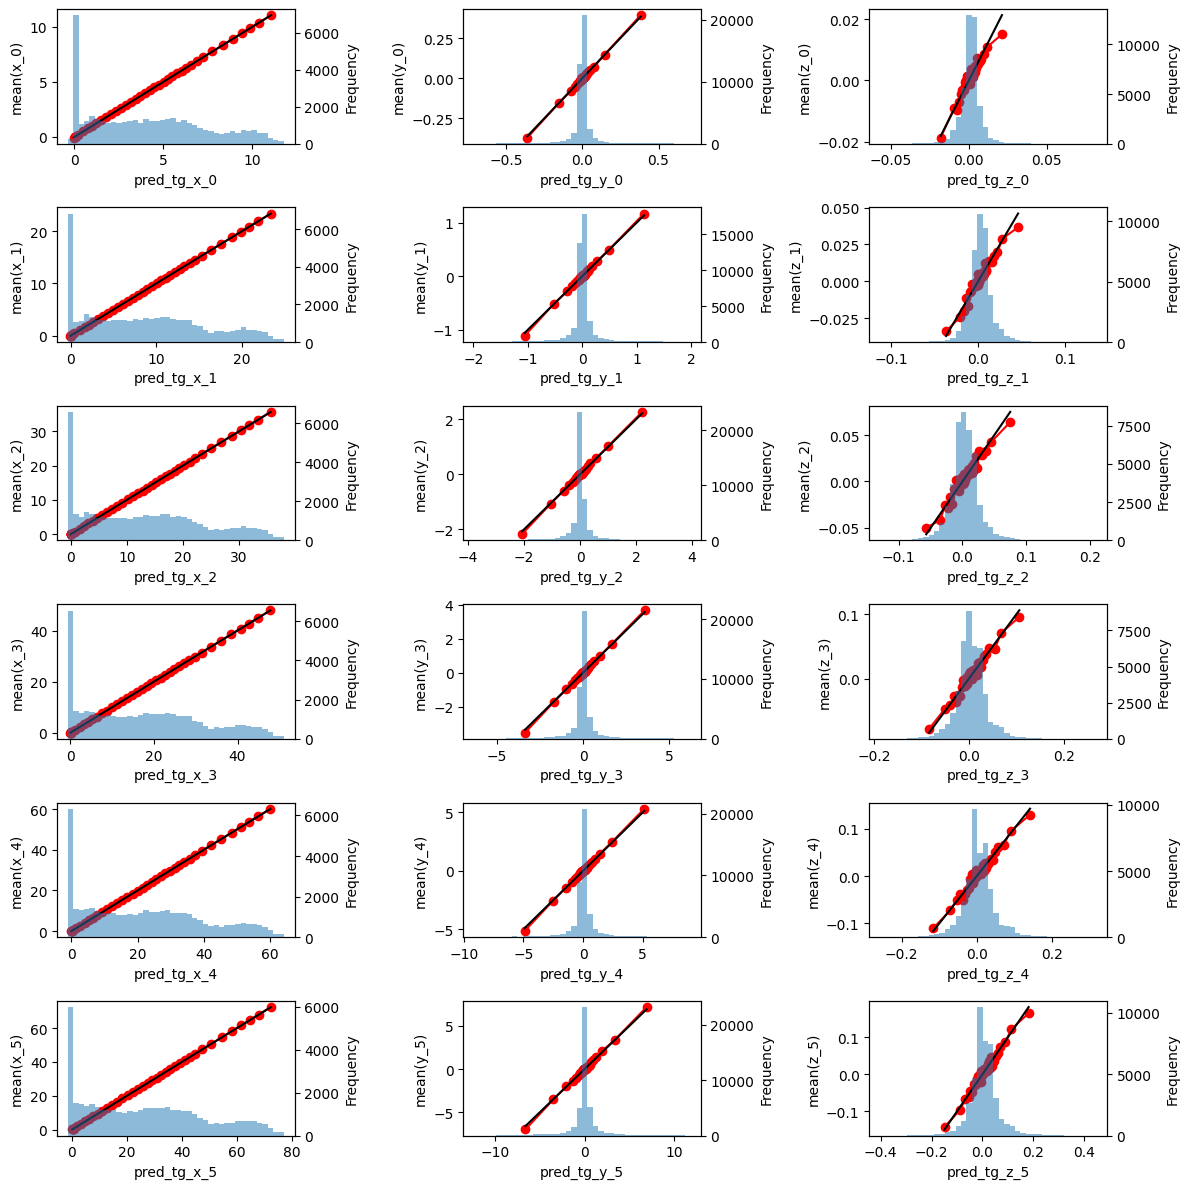

In [11]:
def _create_ax_calibration_curve(
    ax: plt.Axes,
    df: pl.DataFrame,
    x_col: str,
    y_col: str,
    n_bins: int = 30,
) -> plt.Axes:
    """
    キャリブレーションカーブのAxesを作成する

    Args:
        ax (plt.Axes): Axes
        df (pl.DataFrame): データフレーム
        x_col (str): x軸のカラム名
        y_col (str): y軸のカラム名
        n_bins (int): ビンの数

    Returns:
        plt.Axes: Axes
    """
    x_expr = pl.col(x_col)

    df = df.select([x_expr, y_col])
    df = df.with_columns(
        ((pl.col(x_col).rank("min") - 1) // (len(df) / n_bins))
        .clip(0, n_bins - 1)
        .alias("bin")
    )

    bin_df = (
        df.group_by("bin", maintain_order=True)
        .agg(
            pl.col(x_col).mean().alias(x_col),
            pl.col(y_col).mean().alias(y_col),
        )
        .sort("bin")
    )

    # calibration curve
    ax.plot(bin_df.get_column(x_col), bin_df.get_column(y_col), color="red", marker="o")
    ax.plot(bin_df.get_column(x_col), bin_df.get_column(x_col), color="black")
    ax.set_xlabel(x_col)
    ax.set_ylabel(f"mean({y_col})")

    # 第二軸にヒストグラム
    ax2 = ax.twinx()
    ax2.hist(df.get_column(x_col), bins=n_bins, alpha=0.5)
    ax2.set_ylabel("Frequency")

    return ax


def plot_calibration_curve(df: pl.DataFrame, pred_cols: list[str], n_bins: int = 10):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    fig, axs = plt.subplots(6, 3, figsize=(3 * 4, 6 * 2))

    for i, (tg_col, pred_col) in enumerate(zip(tg_cols, pred_cols)):
        ax = axs[i // 3, i % 3]
        _create_ax_calibration_curve(ax, df, pred_col, tg_col, n_bins=n_bins)

    plt.tight_layout()
    plt.show()


plot_calibration_curve(tr_df, pred_cols, n_bins=40)

In [12]:
def predict(models, df: pl.DataFrame, feature_cols: list[str]):
    tg_cols = list(models.keys())
    pred_cols = [f"pred_{col}" for col in tg_cols]

    preds = np.full((len(df), len(tg_cols)), np.nan)
    for i_tg, tg_col in enumerate(tg_cols):
        pred = np.mean(
            [model.predict(df.select(feature_cols)) for model in models[tg_col]], axis=0
        )
        preds[:, i_tg] = pred

    preds = pl.DataFrame(preds, schema=pred_cols)
    return preds


preds = predict(models, ts_df, feature.columns)
preds


pred_tg_x_0,pred_tg_y_0,pred_tg_z_0,pred_tg_x_1,pred_tg_y_1,pred_tg_z_1,pred_tg_x_2,pred_tg_y_2,pred_tg_z_2,pred_tg_x_3,pred_tg_y_3,pred_tg_z_3,pred_tg_x_4,pred_tg_y_4,pred_tg_z_4,pred_tg_x_5,pred_tg_y_5,pred_tg_z_5
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1.475057,-0.057733,0.001069,2.969623,-0.151421,-0.000702,4.546756,-0.299343,-0.004816,6.010614,-0.364045,-0.008194,7.387137,-0.393132,-0.008775,8.482349,-0.47615,-0.012294
0.974233,0.401042,-0.008314,1.809887,1.027798,-0.015373,2.322578,1.783509,-0.014629,2.860147,2.665959,-0.024768,3.503193,3.540395,-0.012752,3.704389,4.286645,-0.015702
1.590818,0.011257,-0.00358,3.173364,0.039873,-0.006755,4.555287,0.029214,-0.01244,5.949481,0.034005,-0.01664,7.098407,0.033262,-0.021988,7.694567,0.074012,-0.026323
0.856059,0.059557,-0.008538,1.687578,0.171578,-0.018961,2.352322,0.24205,-0.026863,2.98842,0.574268,-0.034601,3.616026,1.118091,-0.052353,4.020746,1.699605,-0.072364
0.792578,0.010717,-0.009494,1.482883,0.025919,-0.031478,1.991805,0.053157,-0.055721,2.070084,0.063185,-0.068469,2.206319,0.076791,-0.085099,2.846609,0.100988,-0.100645
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.518287,0.010924,0.00862,13.794292,0.056945,0.025753,21.099079,0.159478,0.034447,28.219147,0.266273,0.056291,35.355333,0.422734,0.058079,42.879201,0.623912,0.05378
6.999809,-0.004852,0.006592,14.867975,-0.028316,0.015017,22.890862,-0.081585,0.028409,31.03618,-0.178846,0.048268,39.133644,-0.239571,0.063109,47.155053,-0.353048,0.082386
7.41354,-0.007545,0.002501,15.703949,-0.03771,0.003499,23.937949,-0.095292,0.005661,32.262762,-0.169417,0.006942,40.507125,-0.253864,0.009694,48.914881,-0.312909,0.014985


In [13]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    for pred_col, submission_col in zip(preds.columns, submission_cols):
        if pred_col != f"pred_tg_{submission_col}":
            raise ValueError(f"Invalid column name: {pred_col}")

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


create_submission_csv(preds)

Submission file is created: submission.csv
